# Importando bibliotecas

In [37]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

## Carregando dados

In [2]:
dataset = pd.read_csv('dados/csv_result-ebay_confianca_completo.csv')

In [3]:
dataset.shape

(5806, 75)

In [4]:
dataset.head()

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,...,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,N,4.181642,0.6,1,2.777591,0.6,0,4.085460,...,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,Bom
3,0,56,N,4.007042,0.6,0,2.698650,0.6,0,4.187338,...,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,Bom
4,0,50,N,4.538230,0.7,1,2.298492,0.5,1,5.085833,...,0.720150,0.694678,0.669652,0.627962,0.553523,0.766618,0.655470,0.645042,0.826039,Bom
5,72,0,N,4.692854,0.3,0,2.987231,0.5,0,4.831320,...,0.739793,0.637027,0.697221,0.638587,0.675289,0.752234,0.679661,0.674438,0.813391,Bom
6,76,0,N,4.966753,0.3,0,3.048730,0.5,0,4.725294,...,0.718530,0.616852,0.692761,0.646695,0.677245,0.699785,0.648607,0.616075,0.816841,Bom


In [5]:
dataset.describe()

,feedbacks,reviews,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,cconscientiousness,...,need_love,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence
count,5806.000000,5806.000000,5806.000000,5806.000000,5806.000000,5806.000000,5806.000000,5806.000000,5806.000000,5806.000000,...,5806.000000,5806.000000,5806.000000,5806.000000,5806.000000,5806.000000,5806.000000,5806.000000,5806.000000,5806.000000
mean,65.047365,0.166896,4.786959,0.476266,0.042714,3.049298,0.466845,0.688942,4.772899,0.556545,...,0.741760,0.740528,0.639086,0.707427,0.645731,0.651150,0.757230,0.694574,0.669770,0.815883
std,28.755538,2.801725,0.347073,0.142604,0.202230,0.361792,0.077834,0.462966,0.380572,0.110192,...,0.030950,0.024205,0.029450,0.016710,0.023310,0.024852,0.019115,0.032888,0.024016,0.013363
min,0.000000,0.000000,1.399464,0.100000,0.000000,-1.403793,0.200000,0.000000,2.953039,0.300000,...,0.623295,0.640543,0.530665,0.642212,0.559316,0.522505,0.678664,0.531540,0.562217,0.730698
25%,49.000000,0.000000,4.591643,0.500000,0.000000,2.871910,0.500000,0.000000,4.552426,0.500000,...,0.722020,0.725207,0.619476,0.697073,0.630265,0.632813,0.745268,0.674089,0.654921,0.807388
50%,57.000000,0.000000,4.777159,0.500000,0.000000,3.086165,0.500000,1.000000,4.757340,0.500000,...,0.743327,0.742432,0.637409,0.707229,0.645992,0.649887,0.758688,0.694888,0.672333,0.815776
75%,83.000000,0.000000,4.969744,0.500000,0.000000,3.260629,0.500000,1.000000,4.982377,0.700000,...,0.762141,0.757603,0.657495,0.717282,0.661789,0.668890,0.770028,0.715616,0.686001,0.823872
max,290.000000,56.000000,7.119144,0.900000,1.000000,5.515797,0.900000,1.000000,7.867835,0.900000,...,0.858957,0.827216,0.759828,0.781361,0.747781,0.769267,0.863673,0.818997,0.780665,0.884518


In [6]:
# Trocando dados para o modelo conseguir identificar

dataset['blacklist'] = dataset['blacklist'].map({'B': 0, 'N': 1})
dataset['reputation'] = dataset['reputation'].map({'Bom': 0, 'Ruim': 1})

In [7]:
np.unique(dataset['blacklist'], return_counts=True)

(array([0, 1], dtype=int64), array([ 784, 5022], dtype=int64))

In [8]:
x = dataset.drop(columns='reputation').values
y = dataset.reputation.values

In [9]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([4299, 1507], dtype=int64))

## Criando treino e teste

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

## Criando e Avaliando Modelo

In [12]:
modelo = RandomForestClassifier()
modelo.fit(x_train, y_train)

RandomForestClassifier()

In [14]:
previsoes = modelo.predict(x_test)

In [15]:
accuracy_score(y_test, previsoes)

0.7401032702237521

In [17]:
cm = confusion_matrix(previsoes, y_test)
cm

array([[845, 287],
       [ 15,  15]], dtype=int64)

In [22]:
# Percentual de acerto de clientes com reputação Boa
cm[0][0] / (cm[0][1] + cm[0][0])

0.7464664310954063

In [24]:
# Percentual de acerto de clientes com reputação Ruim
cm[1][0] / (cm[1][1] + cm[1][0])

0.5

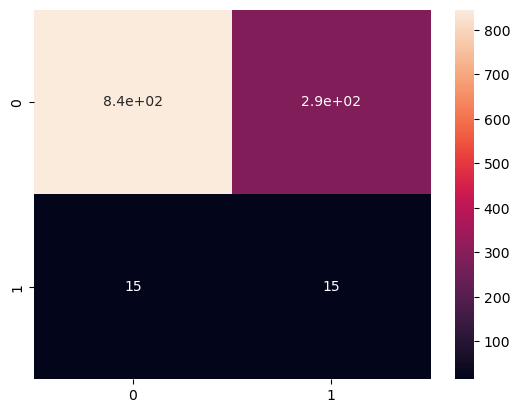

In [19]:
sns.heatmap(cm, annot=True);

## Undersampling

In [26]:
from imblearn.under_sampling import TomekLinks

In [34]:
tl = TomekLinks(sampling_strategy='majority')
x_u, y_u = tl.fit_resample(x, y)

In [35]:
x.shape, x_u.shape

((5806, 74), (5417, 74))

In [36]:
np.unique(y, return_counts=True), np.unique(y_u, return_counts=True)

((array([0, 1], dtype=int64), array([4299, 1507], dtype=int64)),
 (array([0, 1], dtype=int64), array([3910, 1507], dtype=int64)))

In [39]:
## Dividindo em treino e teste
x_train_u, x_test_u, y_train_u, y_test_u = train_test_split(x_u, y_u, test_size=0.2, stratify=y_u)

In [40]:
# Treinando modelo
modelo_u = RandomForestClassifier()
modelo_u.fit(x_train_u, y_train_u)

RandomForestClassifier()

In [41]:
## Avaliando modelo
previsoes_u = modelo_u.predict(x_test_u)
accuracy_score(y_test_u, previsoes_u)

0.7361623616236163

In [42]:
## Avaliando os acertos por grupo
cm_u = confusion_matrix(y_test_u, previsoes_u)
cm_u

array([[778,   4],
       [282,  20]], dtype=int64)

In [51]:
# Percentual de acerto de clientes com reputação boa
cm_u[0][0] / (cm_u[0][1] + cm_u[0][0]) * 100 // 1

99.0

In [50]:
# Percentual de acerto de clientes com reputação ruim
cm_u[1][1] / (cm_u[1][1] + cm_u[1][0]) * 100 // 1

6.0

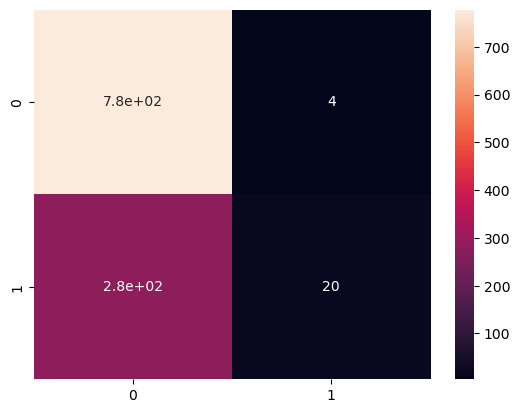

In [44]:
sns.heatmap(cm_u, annot=True);

## Oversampling

In [52]:
from imblearn.over_sampling import SMOTE

In [55]:
smote = SMOTE(sampling_strategy='minority')

In [56]:
x_o, y_o = smote.fit_resample(x, y)

In [58]:
x.shape, x_o.shape

((5806, 74), (8598, 74))

In [59]:
np.unique(y, return_counts=True), np.unique(y_o, return_counts=True)

((array([0, 1], dtype=int64), array([4299, 1507], dtype=int64)),
 (array([0, 1], dtype=int64), array([4299, 4299], dtype=int64)))

In [60]:
## Dividindo base em treino e teste
x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(x_o, y_o, test_size=0.2, stratify=y_o)

In [61]:
## Criando e Treinando modelo
modelo_o = RandomForestClassifier()
modelo_o.fit(x_train_o, y_train_o)

RandomForestClassifier()

In [62]:
## Avaliando modelo
previsoes_o = modelo_o.predict(x_test_o)
accuracy_score(y_test_o, previsoes_o)

0.8267441860465117

In [63]:
cm_o = confusion_matrix(y_test_o, previsoes_o)
cm_o

array([[706, 154],
       [144, 716]], dtype=int64)

In [66]:
# Percentual de acerto de cliente com boa reputação
cm_o[0][0] / (cm_o[0][0] + cm_o[0][1])

0.8209302325581396

In [67]:
cm_o[1][1] / (cm_o[1][0] + cm_o[1][1])

0.8325581395348837

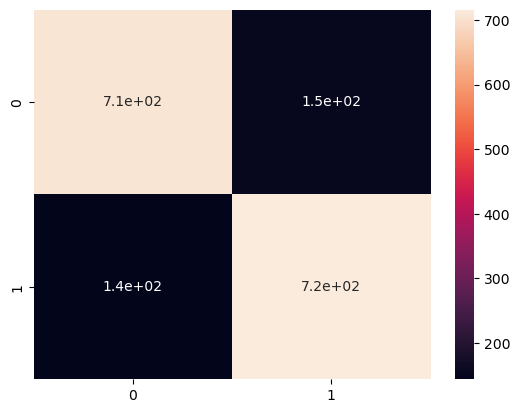

In [69]:
sns.heatmap(cm_o, annot=True);

**Conclusão:** Utilizar o Oversampling nessa situação foi a melhor maneira de aumentar a acertividade do modelo para os clientes que possuiam uma reputação "Ruim", ja os que possuiam "Boa" reputação o aumento não foi muito significativo.